In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

#### Task 4

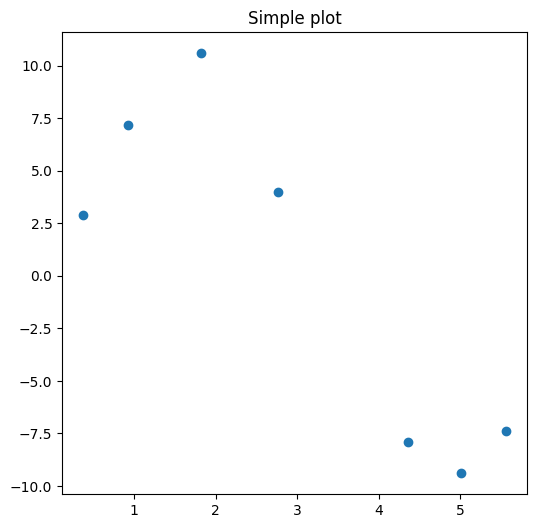

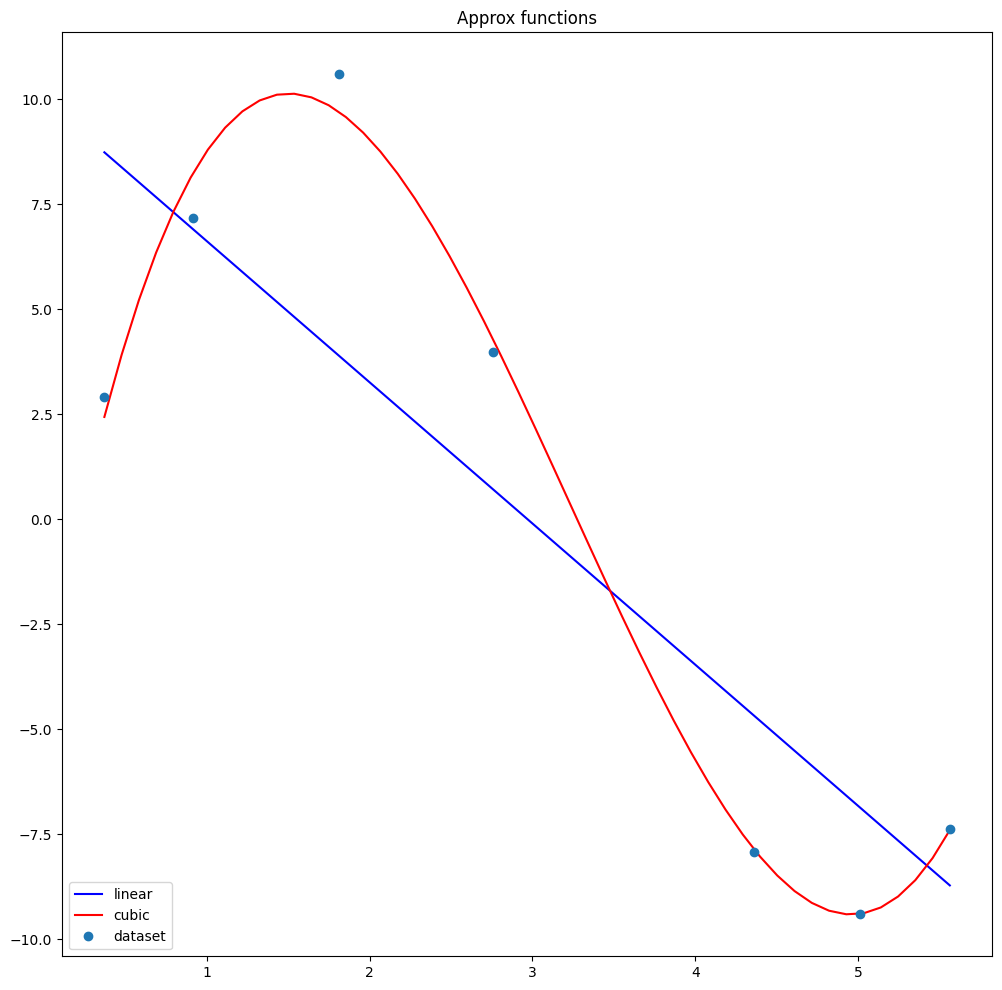

In [8]:
np.random.seed(777)
N = 7
dataset = np.random.uniform(0, 6, N)
sin_func = lambda x: 10 * np.sin(x)
sin_func = np.vectorize(sin_func)
errors = np.random.normal(0, 1, N)
plt.figure(figsize=(6,6))
plt.title("Simple plot")
plt.plot(dataset, sin_func(dataset) + errors, 'o')
plt.show()

approx_1 = np.poly1d(np.polyfit(dataset, sin_func(dataset) + errors, 1))
approx_3 = np.poly1d(np.polyfit(dataset, sin_func(dataset) + errors, 3))
x_axis = np.linspace(np.min(dataset), np.max(dataset))

plt.figure(figsize=(12, 12))
plt.title("Approx functions")
plt.plot(x_axis, approx_1(x_axis), color='blue', label='linear')
plt.plot(x_axis, approx_3(x_axis), color='red', label='cubic')
plt.plot(dataset, sin_func(dataset) + errors, 'o', label='dataset')
plt.legend(loc='lower left')
plt.show()

#### Task 5

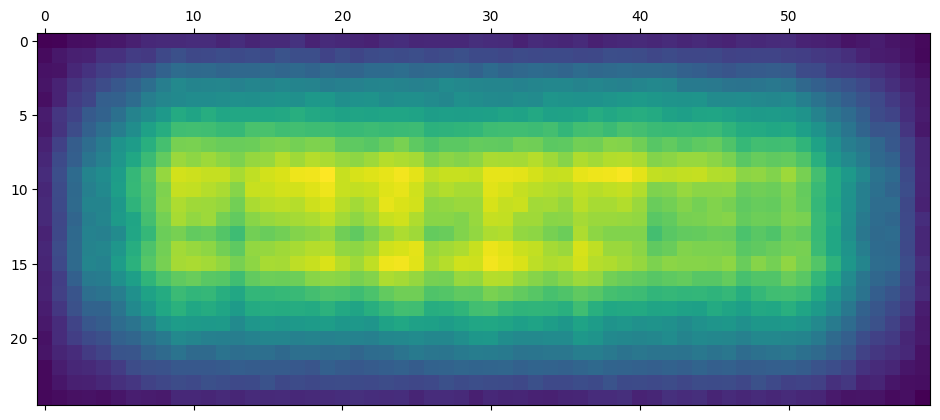

In [60]:
image_matrix = pd.read_hdf('image_data.hdf', key='A')
filter_matrix = pd.read_hdf('image_data.hdf', key='C')
def mat2vec(A):
    A = np.flipud(A)
    a = np.reshape(A, np.prod(A.shape))
    return a

def vec2mat(a, shape):
    A = np.reshape(a, shape)
    A = np.flipud(A)
    return A

plt.matshow(image_matrix, fignum=None)

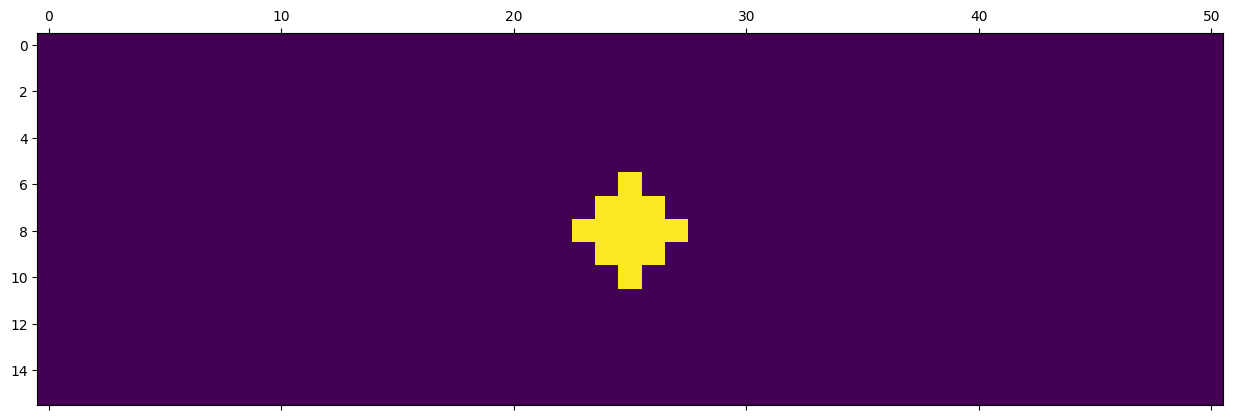

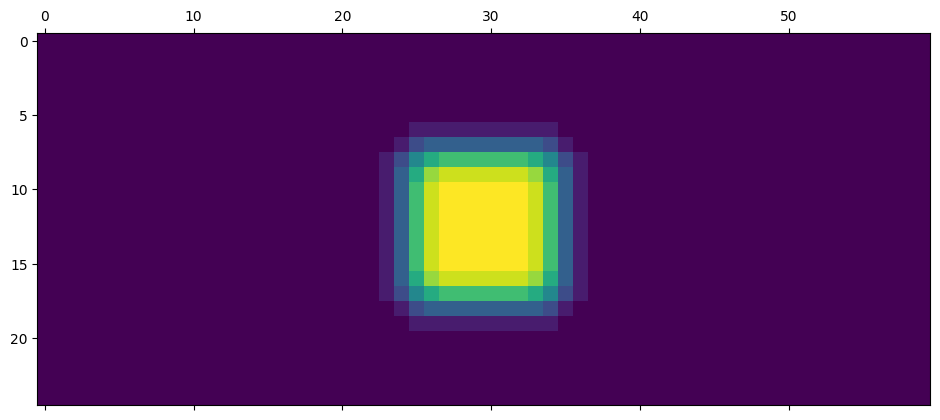

In [68]:
height, width = (16,51)
ones = np.ones(shape=(height, width))
center = (height//2, width//2)
radius = 2

# Create a grid of distances from the center
y, x = np.ogrid[:height, :width]
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

# Create the mask
mask = distance_from_center <= radius
ones[~mask] = 0
plt.matshow(ones)
plt.matshow(vec2mat((filter_matrix @ mat2vec(ones)).values, shape=image_matrix.shape))

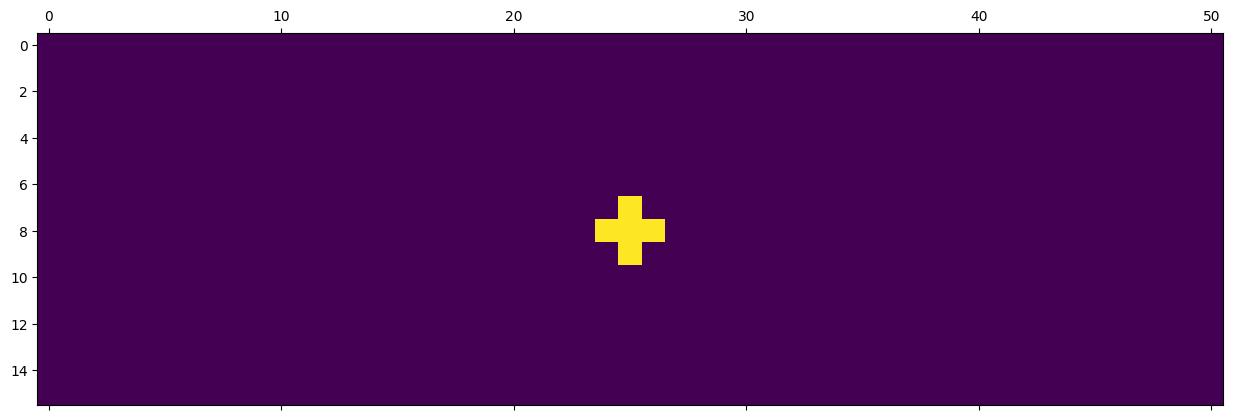

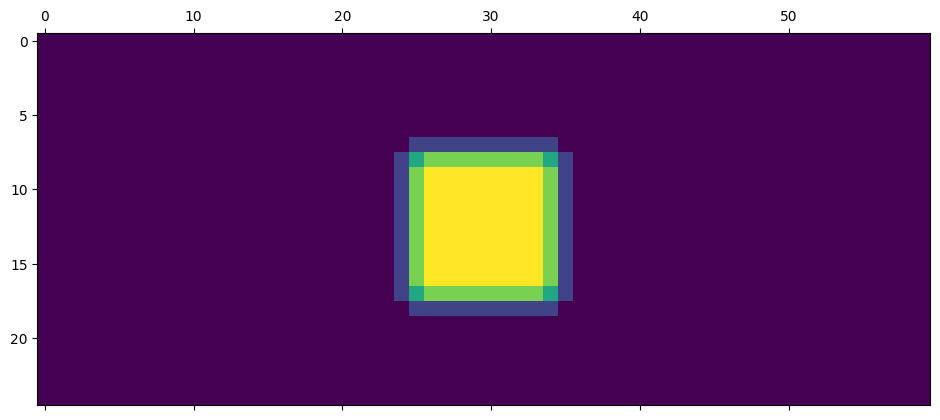

In [69]:
height, width = (16,51)
ones = np.ones(shape=(height, width))
center = (height//2, width//2)
radius = 1

# Create a grid of distances from the center
y, x = np.ogrid[:height, :width]
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

# Create the mask
mask = distance_from_center <= radius
ones[~mask] = 0
plt.matshow(ones)
plt.matshow(vec2mat((filter_matrix @ mat2vec(ones)).values, shape=image_matrix.shape))

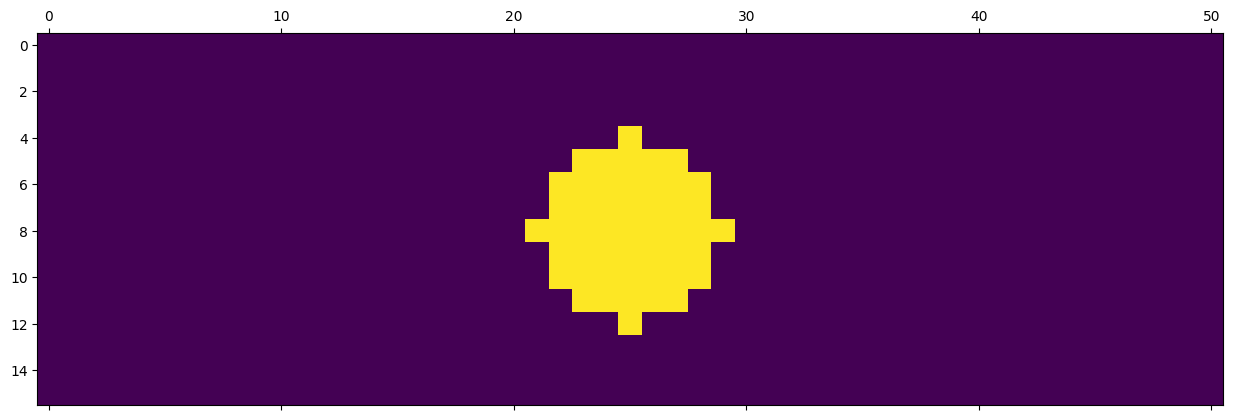

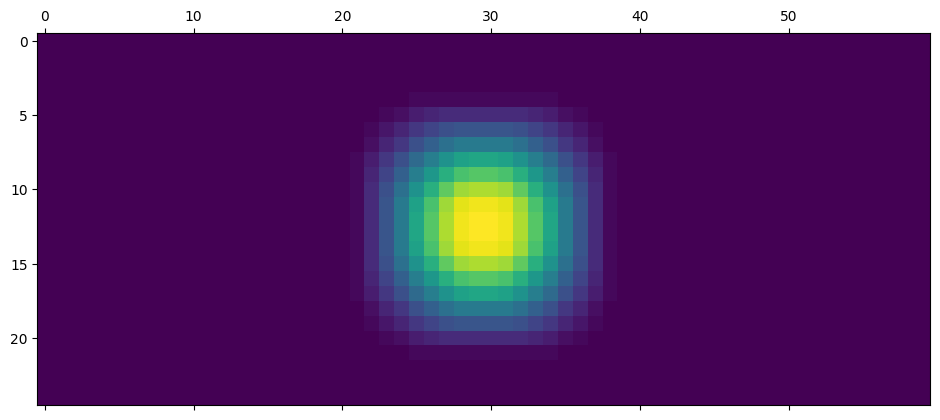

In [70]:
height, width = (16,51)
ones = np.ones(shape=(height, width))
center = (height//2, width//2)
radius = 4

# Create a grid of distances from the center
y, x = np.ogrid[:height, :width]
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

# Create the mask
mask = distance_from_center <= radius
ones[~mask] = 0
plt.matshow(ones)
plt.matshow(vec2mat((filter_matrix @ mat2vec(ones)).values, shape=image_matrix.shape))

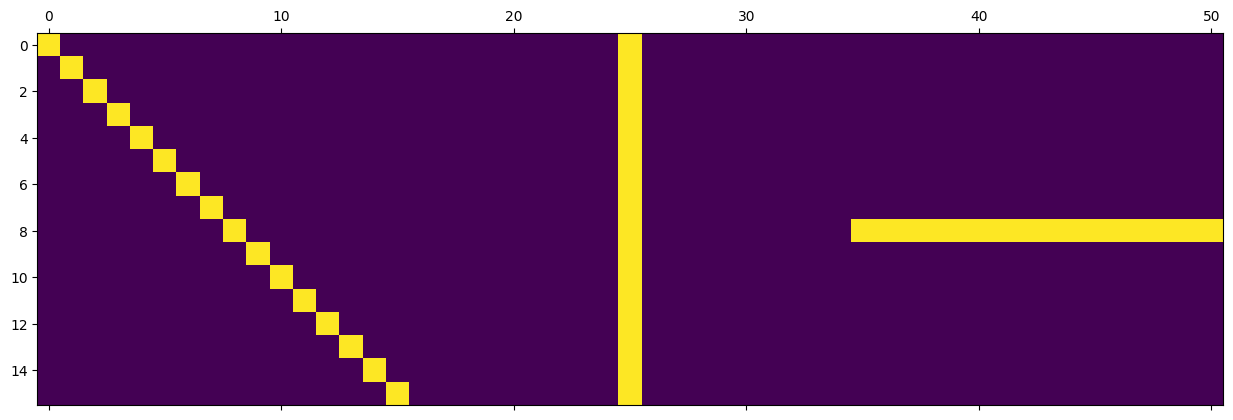

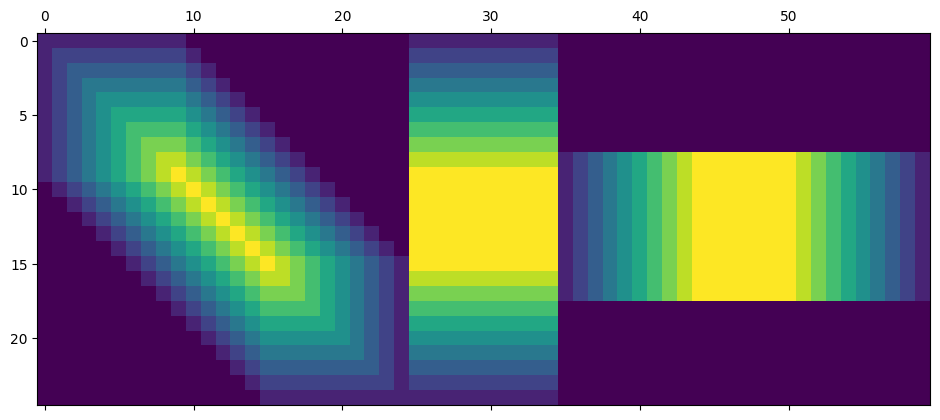

In [82]:
height, width = (16,51)
ones = np.ones(shape=(height, width))
center = (height//2, width//2)
radius = 4

# Create a grid of distances from the center
y, x = np.ogrid[:height, :width]
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

# Create the mask
ones[:, :] = 0
for i in range(ones.shape[0]):
    ones[i, i] = 1
    ones[i, ones.shape[1] // 2] = 1
    ones[ones.shape[0] // 2, -i - 1] = 1

plt.matshow(ones)
plt.matshow(vec2mat((filter_matrix @ mat2vec(ones)).values, shape=image_matrix.shape))

Пиксель переводится в прямоугольник
Обратим фильтр

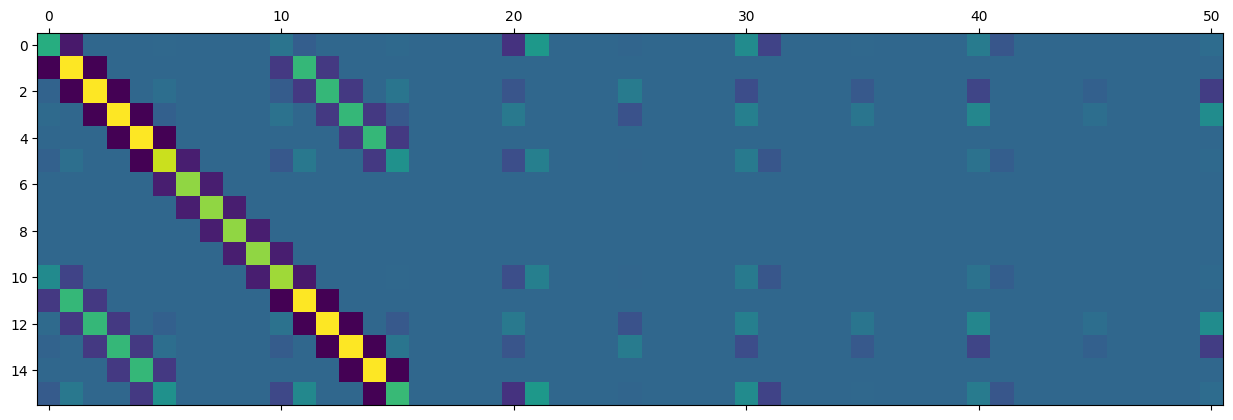

In [94]:
height, width = image_matrix.shape
ones = np.ones(shape=(height, width))
center = (height//2, width//2)
radius = 4

# Create a grid of distances from the center
y, x = np.ogrid[:height, :width]
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

# Create the mask
ones[:, :] = 0
for i in range(ones.shape[0]):
    ones[i, i] = 1
    ones[i, ones.shape[1] // 2] = 1
    ones[ones.shape[0] // 2, -i - 1] = 1
plt.matshow(vec2mat((np.linalg.pinv(filter_matrix) @ mat2vec(ones)), shape=(16, 51)))

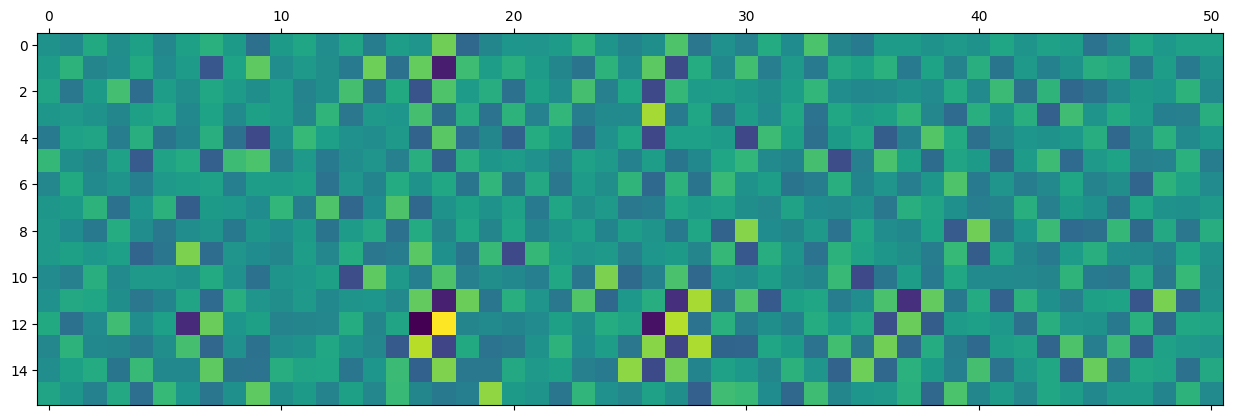

In [92]:
plt.matshow(vec2mat((np.linalg.pinv(filter_matrix) @ mat2vec(image_matrix)), shape=(16, 51)))

In [84]:
U, S, L = np.linalg.svd(filter_matrix)

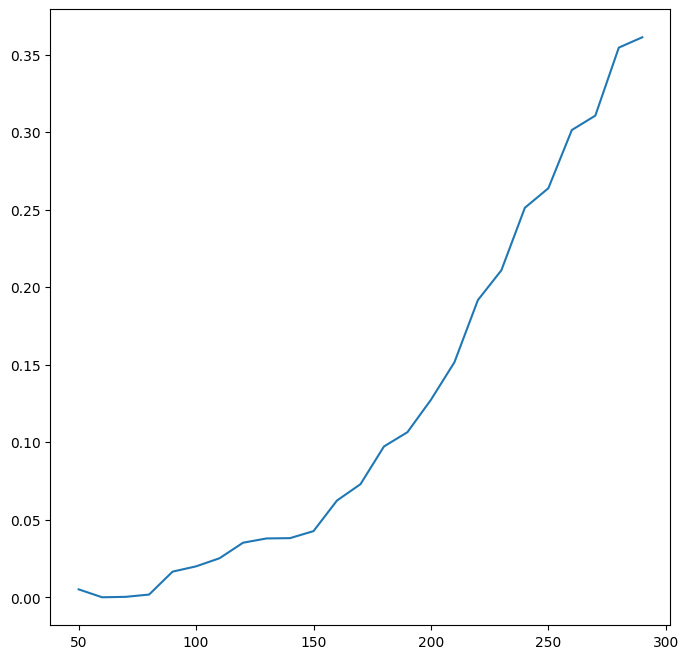

In [115]:
result = lambda Upper, Center, Lower, requestedRank: Upper[: , :requestedRank] @ np.diag(Center[:requestedRank])  @ Lower[:requestedRank, :]
singular_n = lambda number: result(*np.linalg.svd(filter_matrix), number)
singular_n = np.vectorize(singular_n)
std_disp = lambda number: np.std(vec2mat((np.linalg.pinv(singular_n(number)) @ mat2vec(ones)), shape=(16, 51)))
std_disp = np.vectorize(std_disp)

test_case = np.arange(50, 300, 10)
plt.figure(figsize=(8, 8))
plt.plot(test_case, (std_disp(test_case) - np.std(ones)) ** 2)
plt.show()

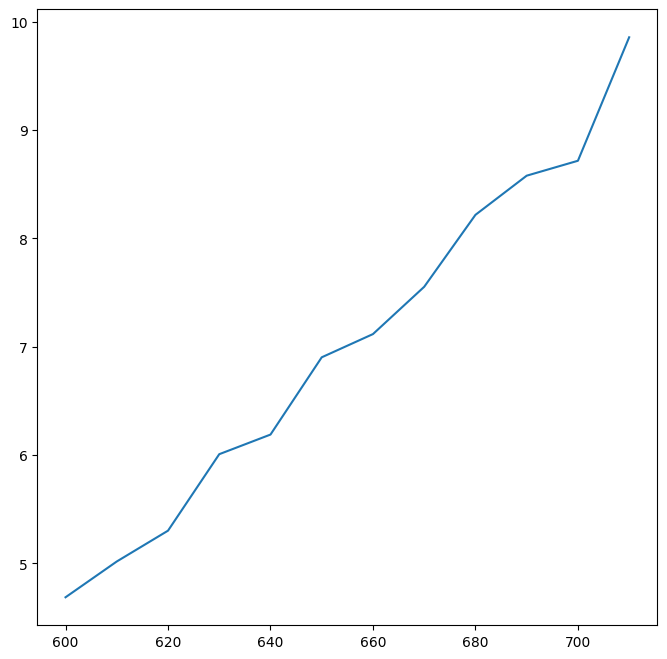

In [125]:
test_case = np.arange(600, 720, 10)
plt.figure(figsize=(8, 8))
plt.plot(test_case, (std_disp(test_case) - np.std(ones)) ** 2)
plt.show()

Применим алгоритм восстановления на исходное изображение

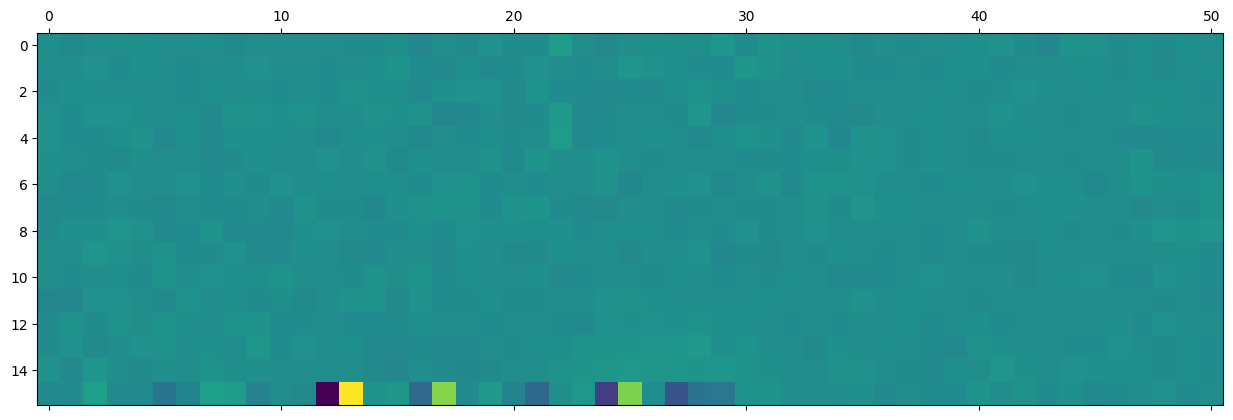

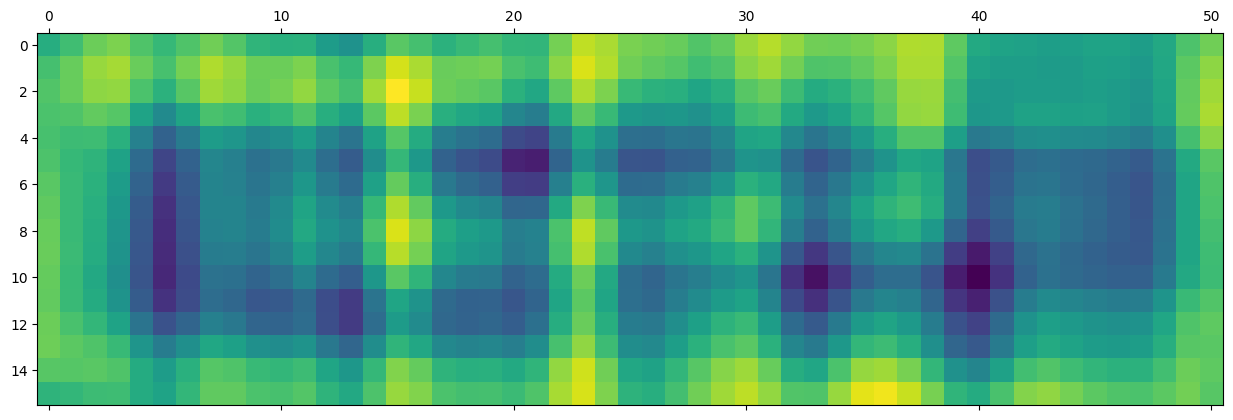

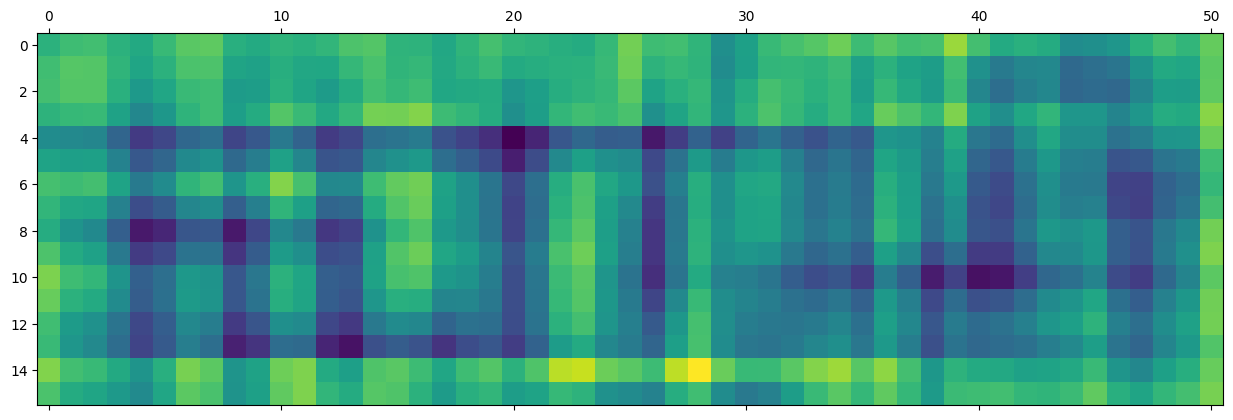

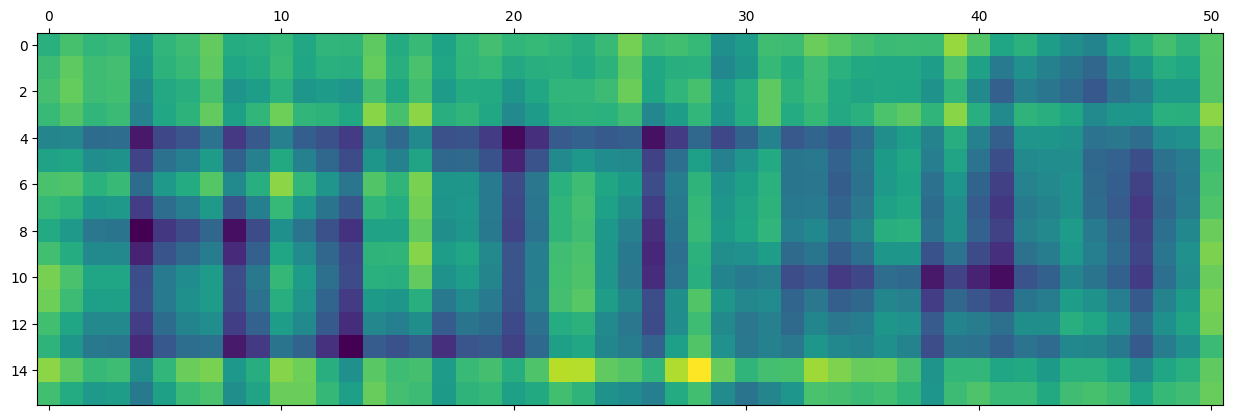

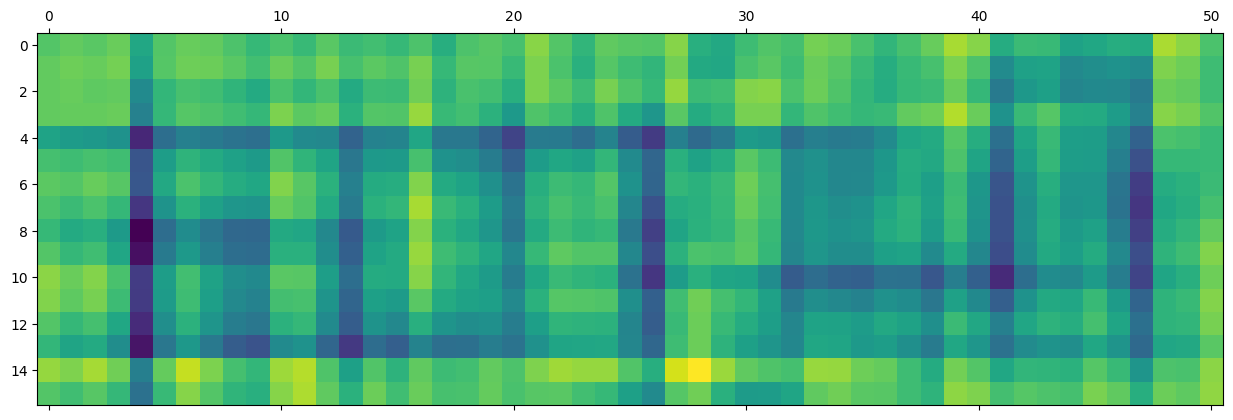

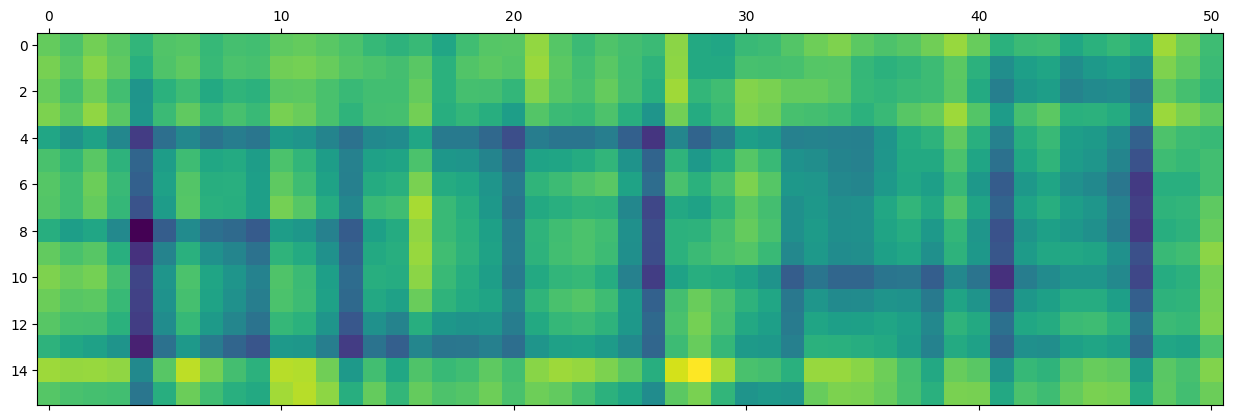

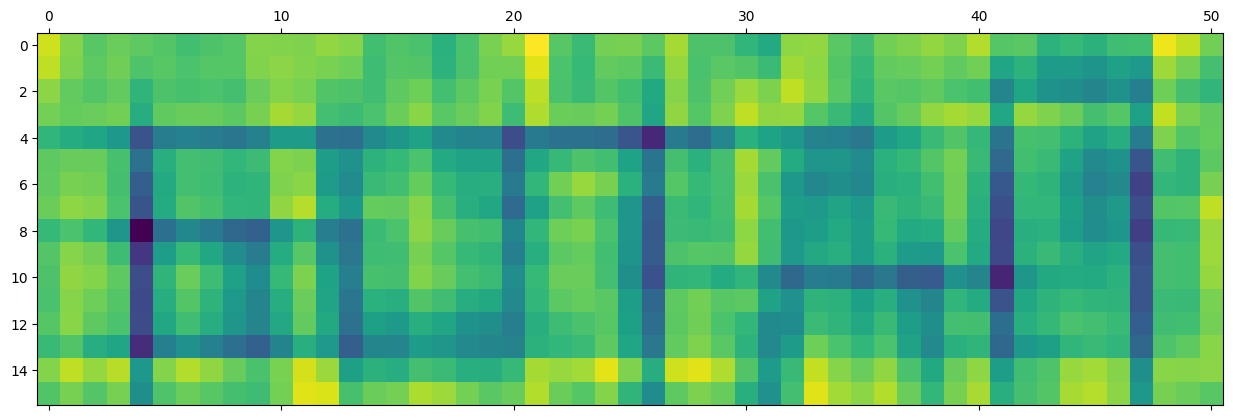

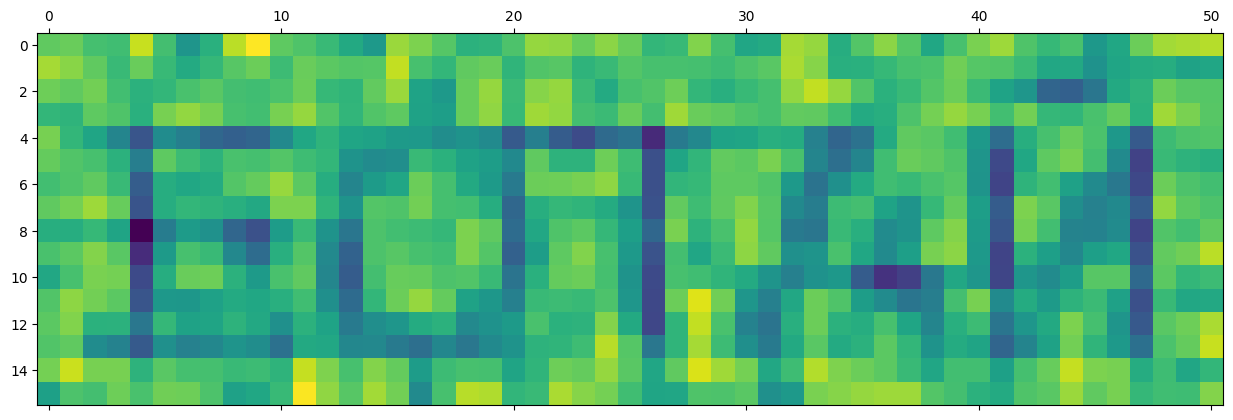

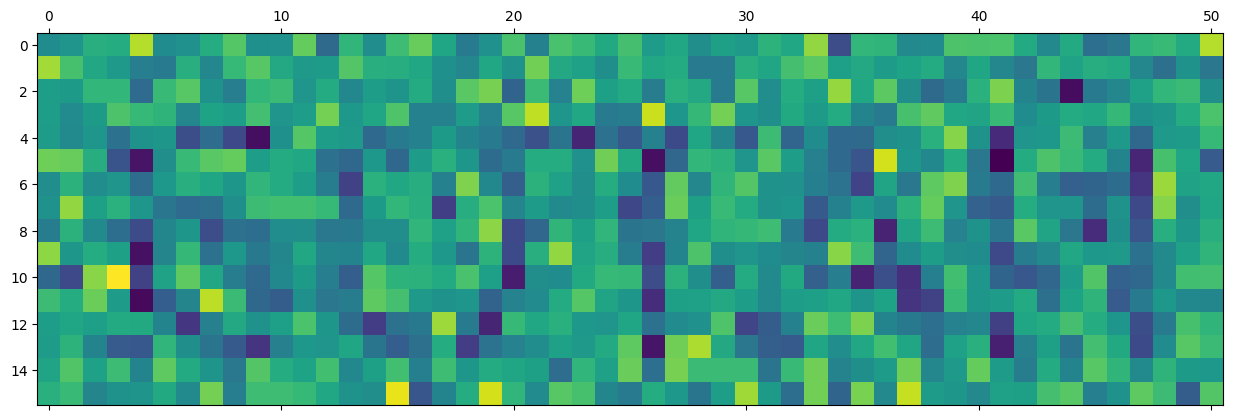

In [166]:
source_image = lambda number: vec2mat((np.linalg.pinv(singular_n(number)) @ mat2vec(image_matrix)), shape=(16, 51))
kernel_size = image_matrix.shape[0] * image_matrix.shape[1]
for i in [30, 60, 100, 110, 130, 150, 200, 300, 500]:
    plt.matshow(source_image(i))

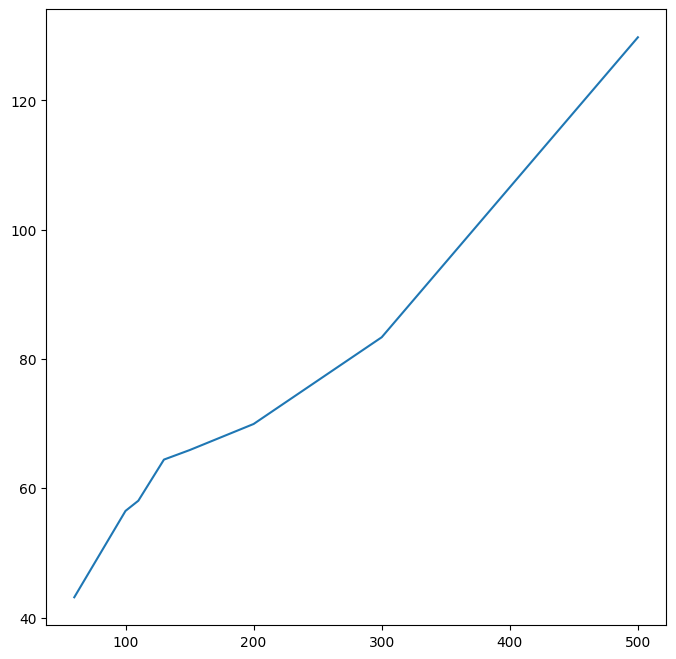

In [168]:
std_disp = lambda number: np.std(vec2mat((np.linalg.pinv(singular_n(number)) @ mat2vec(image_matrix)), shape=(16, 51)))
std_disp = np.vectorize(std_disp)

test_case = np.array([60, 100, 110, 130, 150, 200, 300, 500])
plt.figure(figsize=(8, 8))
plt.plot(test_case, (std_disp(test_case)))
plt.show()

#### Task 6

$$min = min |Ax - b|^2$$

$(Ax - b)^2 = (Ax - b)^T (Ax -b)$

$(Ax - b)^T (Ax -b) = (x^T A^T - b^T)(Ax - b) = x^TA^TAx - 2b^TAx- b^Tb$

Добавляем вариацию
$L = x^TA^TAx - 2b^TAx - b^2 - \lambda^T C x$

Берем производные:

$\dfrac{\partial L}{\partial \lambda} = \dfrac{\partial \lambda^T C x}{\partial \lambda} = \dfrac{\partial x^TC^T \lambda}{\partial \lambda} = x^T C^T = 0$

$\dfrac{\partial L}{\partial x} = 2x^TA^TA  - 2b^T A - \lambda^T C = 0$


$0 = 2 x^T - 2b^T A (A^TA)^{-1} - \lambda^TC(A^TA)^{-1}$

$Cx = 0 <=> x^T C ^ T = 0$

$0 = -(2b^TA(A^TA)^{-1})C^T - \lambda^TC(A^TA)^{-1}C^T$

$- \lambda^T C(A^TA)^{-1}C^T = 2b^TA(A^TA)^{-1}C^T$

По условию $C(A^TA)^{-1}C^T$ - обратима

$$\lambda^T = -2b^TA(A^TA)^{-1}C^T(C(A^TA)^{-1}C^T)^-1$$

Теперь просто нужно выразить через
$0 = 2 x^T - 2b^T A (A^TA)^{-1} - \lambda^TC(A^TA)^{-1}$